In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from qbm import QBM, Duality
from tqdm import tqdm

# matplotlib styling
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = '12'

In [2]:
s1 = QBM(16)
d1 = Duality(s1)
s2 = QBM(17)
d2 = Duality(s2)

100%|██████████| 17/17 [00:00<00:00, 21.76it/s]


In [27]:
pcs = lambda k, d: d.plot_compare_states(
    d.h_pqs[-1-k], d.s.move_hs(k, (d.N//2, d.N//2)), k
)

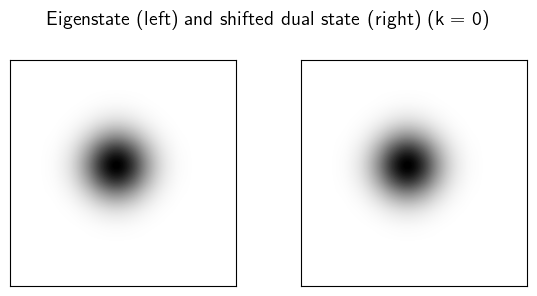

In [29]:
pcs(0, d1)

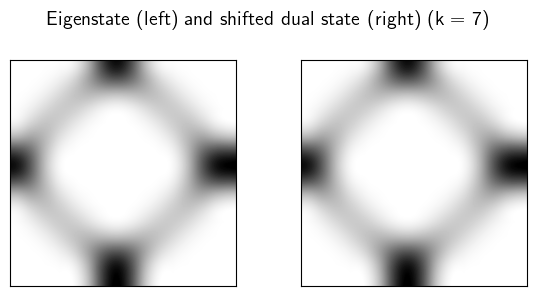

In [31]:
pcs(7, d1)

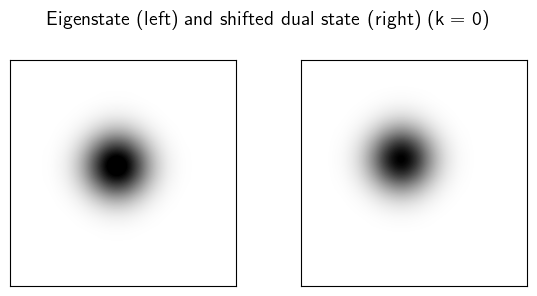

In [33]:
pcs(0, d2)

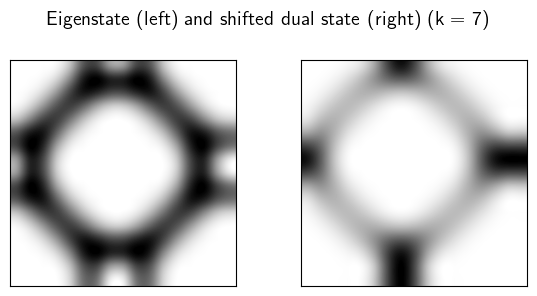

In [32]:
pcs(7, d2)

In [14]:
ph = lambda d: [
    np.round(
        d.k_phase(_, False)/np.pi, 10
        ) for _ in range(d.N)
    ]

ph_ = lambda d: [
    np.round(
        d.k_phase(_, True), 10
        ) for _ in range(d.N)
    ]

In [18]:
ph(d1)

[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 -0.5,
 0.5,
 -0.5,
 0.5,
 -0.5,
 0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5]

In [24]:
np.abs(ph_(d2))

array([0.95477523, 0.86621496, 0.78113762, 0.69882206, 0.61812689,
       0.53691408, 0.45179742, 0.36488567, 0.63719292, 0.36488567,
       0.45179742, 0.53691408, 0.61812689, 0.69882206, 0.78113762,
       0.86621496, 0.95477523])

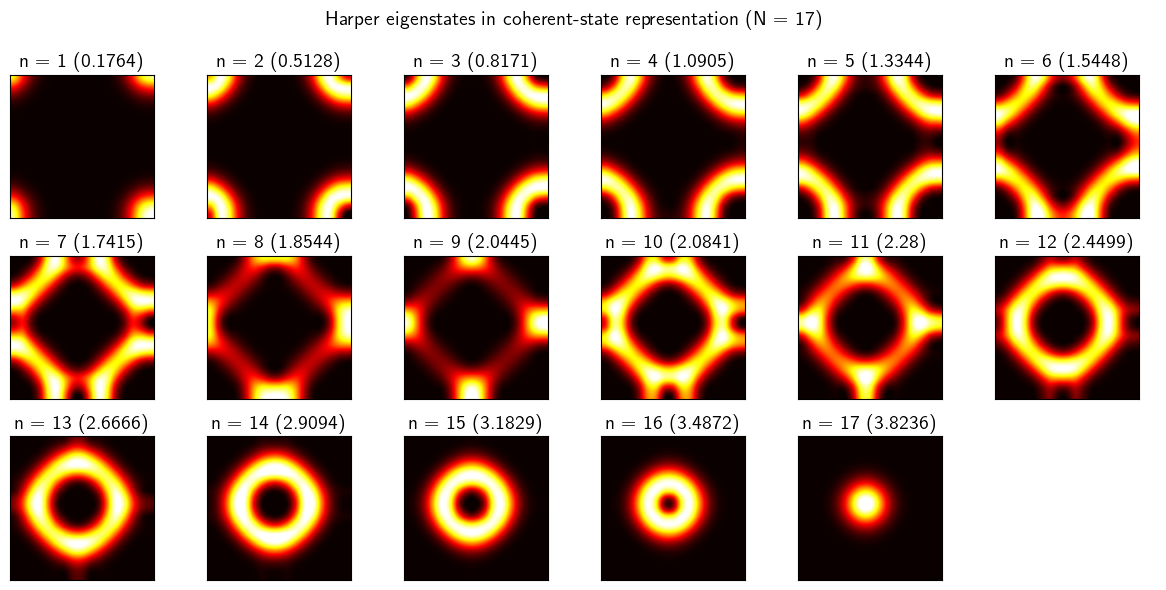

In [11]:
d2.plot_harper_states(nc = 6)